In [1]:
# Table of content-- ask how to put them

In [2]:
# 1. Introduction
# A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences.
# It also including chance event outcomes, resource costs, and utility.
# It is widely used supervised learning algorithms both for regression and classification tasks.
# Everyday we need to make numerous decisions, many small and a few big.
# Whenever we are in dilemna, we are always taking decisions unconsciously using the help of decision tree.
# We take series of questions in a nested IF-THEN statement and reach to a particular outcome

In [3]:
# 2. Problem Statement
#RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean on 15 April 1912.
#On April 15, 1912 the Titanic sank, costing the lives of 1502 out of 2224 passengers and crew.
#Unfortunately, there weren’t enough lifeboats for everyone onboard, causing a disproportionate number of deaths.
#The reason behind sinking of this beauty was because of striking to an iceberg while travelling from Southampton to New York City.
#While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


In [4]:
#Scenario
#One of the most popular disasters in the history is the sinking of the RMS Titanic.
#Let's say, after the accident, there is a need to implement better regulations for passenger liners.
#As a part of a data science team, you have been tasked with analyzing the passenger data of the RMS Titanic.
#You have been provided with the data that contains the information about the passengers aboarded the ship.
#The purpose is to analyze and explore factors that can influence a person’s likelihood to survive.
#So, the primary objectives are to:
#Do a statistical analysis of how some group of people were survived more than others.
#Perform an Exploratory Data Analysis of titanic dataset with visualizations and storytelling.

In [5]:
# 3. Installing Libraries

In [6]:
# 3.1 Installing Libraries
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q yellowbrick                                         # Toolbox for Measuring Machine Performance

zsh:1: command not found: pip
zsh:1: command not found: pip
zsh:1: command not found: pip


In [7]:
#3.2 Upgrading Libraries
#After upgrading the libraries, you need to restart the runtime to make the libraries in sync.
#Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [8]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

zsh:1: command not found: pip
zsh:1: command not found: pip


In [32]:
#3.3 Importing Libraries

#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
#from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # To scaled data with mean 0 and variance 1
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.tree import DecisionTreeClassifier                     # To implement decision tree classifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report                   # To generate classification report
from sklearn.metrics import plot_confusion_matrix                   # To plot confusion matrix
#import pydotplus                                                    # To generate pydot file
from IPython.display import Image                                   # To generate image using pydot file
from sklearn.model_selection import GridSearchCV                    # To find best hyperparamter setting for the algorithm
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
# 4. Data Acquisition & Description- Ask to enter it

In [ ]:
# The dataset consists of the information about people boarding the famous RMS Titanic.
#Records	Features	Dataset Size
#891	12	58.9 KB

#ID	Feature Name	Description of the feature
#01	PassengerId	Identity of the passenger
#02	Survived	Whether the passenger survived or not
#03	Pclass	Class of the ticket holder
#04	Name	Name of the passenger
#05	Sex	Sex of the passenger
#06	Age	Age of the passenger
#07	SibSp	Siblings and/or spouse travelling with passenger
#08	Parch	Parents and/or children travelling with passenger
#09	Ticket	Ticket number
#10	Fare	Price of the ticket
#11	Cabin	Cabin number
#12	Embarked	Port of Embarkation

In [10]:
# Load the data
data = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv')

# Get the dimesions of data
print('Shape of the dataset:', data.shape)

# Output first 5 data rows
data.head()

Shape of the dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#4.1 Data Description
#In this section we will get information about the data and see some observations.

In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Observations:
    
#Survived:
#More than 50% did not survive the accident.

#Pclass:
#There are a lot more 3rd class passengers than 1st and 2nd class.
#We can also see that there are more 2nd class passengers than 1st class passengers.
#SibSp:
#More than 50% of passengers are not travelling with their siblings or a spouse.
#There are some passengers who are travelling with as maximum as 8 siblings and spouse.
#Parch:
#More than 75% passengers are not travelling with a parent or children
#But there are some passengers who have a maximum number of 6 children and/or parents with them on the ship.
#We observe that a vast majority of passengers are not travelling with their family members.
#Age:
#The average age of passengers is around 29 years while the minimum and maximum ages are 0.4 years and 80 years respectively.
#There is some missing data in the Age feature.
#Fare:
#The average price of ticket seems to be £32.2. Minimum price of the ticket is recorded as £0 and maximum price recorded as high as £512.32.
#More than 50% of the passengers have paid atleast £14
#More than 75% passengers have paid atleast £7 for their ticket whereas less than 25% have paid for more than £31.
#We have to replace the minimum value in the Fare feature with a reasonable value.

In [ ]:
#4.2 Data Information

In [ ]:
#In this section we will see the information about the types of the features

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Observations:
#The data types of all the features look appropriate.
#There are missing values present in the Age, Cabin and Embarked features.
#Age and Cabin have a significant amount of missing values which requires further investigation.

In [ ]:
#5. Data Pre-processing

In [ ]:
#5.1 Data Pre-profiling

In [ ]:
#For quick analysis pandas profiling is very handy.
#Generates profile reports from a pandas DataFrame.
#For each column statistics are presented in an interactive HTML report.

In [ ]:
# profile = ProfileReport(df=data)
# profile.to_file(output_file='Pre Profiling Report.html')
# print('Accomplished!')

In [ ]:
**Observations:**

- The report shows that there are a **total** of **12 features** out of which **7** are **numerical** and **5** are **categorical**.

- Only **342** passengers out of **891** survived the accident.

- **Name**, **Ticket**, and **Cabin** features have high cardinality and are uniformly distributed.

- **PassengerId** is having a uniformly distribution in the dataset.

- **Fare** feature is highly skewed towards right while **Age** feature is faily symmetrical.

- There are **no duplicate** rows in the dataset while a lot of **zeros** are present in **Fare**, **Sibsp** and **Parch** features.

- We can observe that **8.1%** of data in cells is **missing**:
  - Age (17 missing values) &rarr; Fill with median.
  - Cabin (687 missing values) &rarr; Fill with median.
  - Embarked (2 missing values) &rarr; Fill with mode.

- **Embarked** feature has just **2 missing values**.

- For detailed information, check the **Pre Profiling Report.html** file.

In [ ]:
# 5.2 Data Cleaning

In [ ]:
#Now we will perform all the necessary operations that are required to clean and rectify the schema of the dataset.

In [13]:
# Filling the missing values of Embarked feature with the mode of the feature.
data['Embarked'] = data['Embarked'].fillna(value=data['Embarked'].mode()[0])

# Filling the missing values of Age feature with the median age.
data['Age'].fillna(value=data['Age'].median(), inplace=True)

# Dropping the Cabin feature
data.drop(labels='Cabin', axis=1, inplace=True)

In [ ]:
# 5.3 Data Post Profilling
#Next, we will generate and verify the report to identify any new observation that can help us in further analysis.

In [ ]:
# post_profile=ProfileReport(df=data)
# post_profile.to_file(output_file='Post Profiling Report.html')
# print('Accomplished!')

In [ ]:
Observations:
You can compare the two reports, i.e Pre Profiling Report.html and Post Profiling Report.html.
Observations in Post Profiling Report.html:
In the Dataset info, Total Missing = 0.0%
Number of features = 11
You can see the difference in the Age feature in both the reports.
A lot of zeros are present in Sibsp and Parch features. They won't be removed as they are necessary.
We can observe that Pclass and Fare are highly correlated to each other inversely.
A lot of inverse correlations are observed among the features.
For detailed information, check the Post Profiling Report.html file.
We can now begin the Exploratory Data Analysis.

In [ ]:
# 6. Exploratory Data Analysis

In [ ]:
#Before diving further, we will create some new features that will be useful for analyzing the data.
#These features will be FamilySize and Title.
#The FamilySize will describe the frequency of family members.
#The Title will describe salutation of the passenger.

In [14]:
# Creating a new feature FamilySize from Sibsp and Parch
data['Family Size'] = data['SibSp'] + data['Parch'] + 1

#Creating title feature from name
data['Title'] = data['Name'].str.extract(pat=' ([A-Za-z]+)\.', expand=False)

data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [ ]:
# Creating a crosstab between Sex and Title
pd.crosstab(index=data['Sex'], columns=data['Title'])

In [ ]:
# There are a lot of titles for passengers. We will simplify these into selected categories.
# We will arrange the Males and Females into Mr, Mrs, Master, and Miss and put the neutral titles as Other

In [16]:
# Rearranging titles into common titles

data['Title'].replace(to_replace=['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                      value=['Miss', 'Miss', 'Miss', 'Other', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                      inplace=True)

#lets check now sex and title agian

In [17]:
# Creating a crosstab between Sex and Title again
pd.crosstab(index=data['Sex'], columns=data['Title'])

Title,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,0,127,1
male,40,0,522,0,15


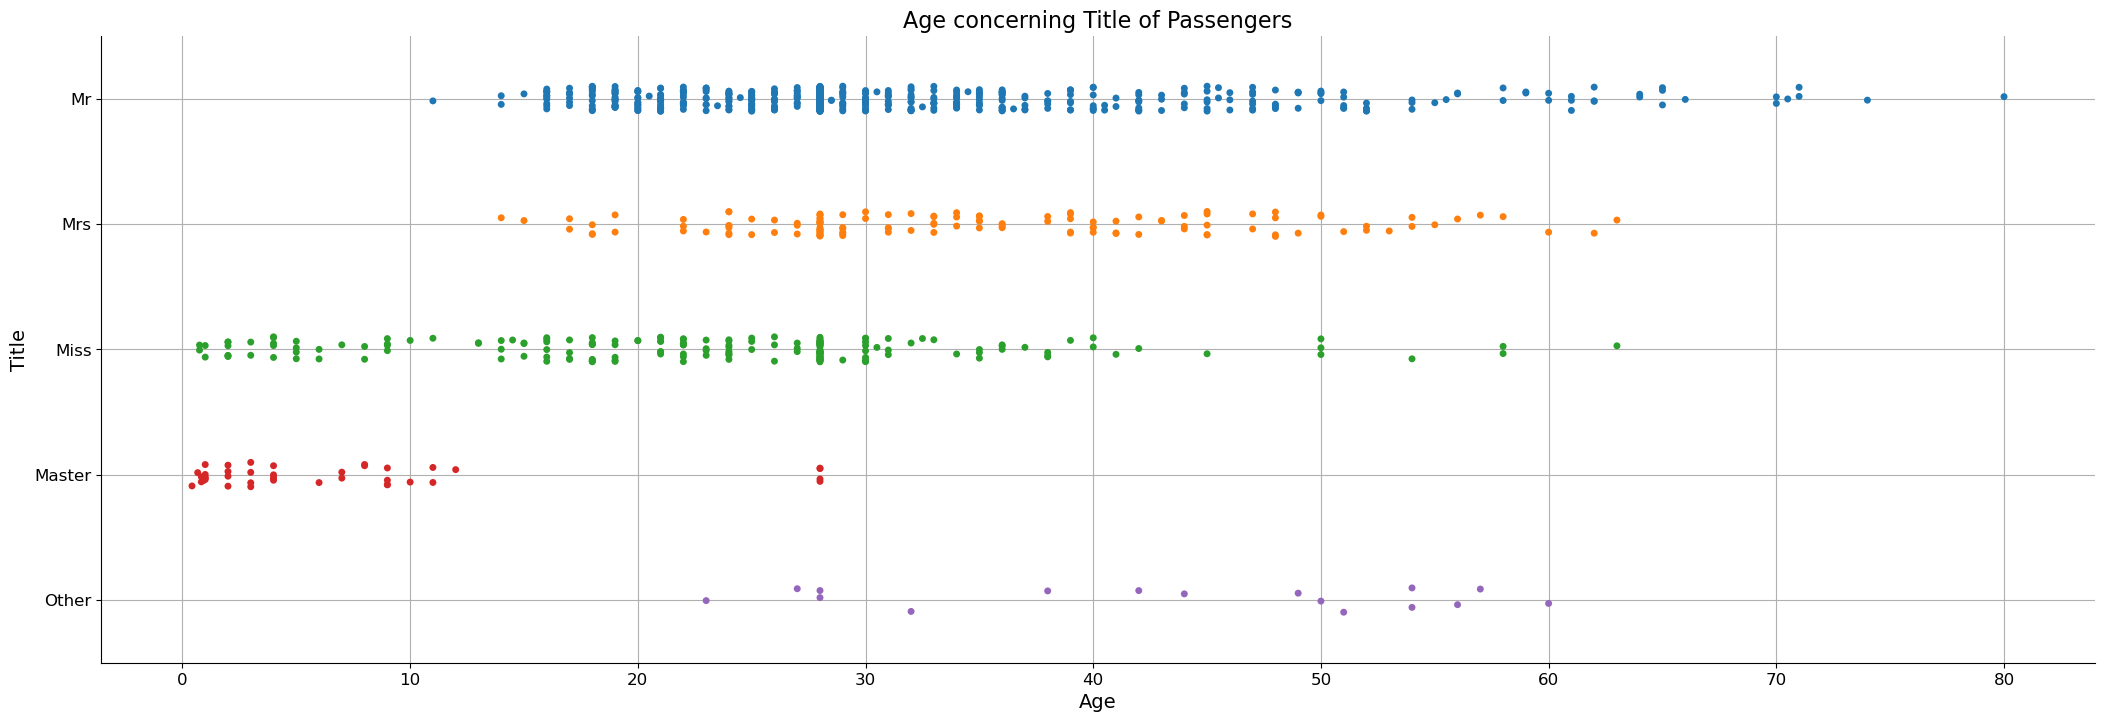

In [21]:
#Question:
#What is the relationship between age and the title of the passengers?
# Plot a catplot for Age comparing the title of passengers
sns.catplot(x="Age", y="Title", data=data, size=7, aspect=3)

# Add cosmetics 
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel(xlabel='Age', size=14)
plt.ylabel(ylabel='Title', size=14)
plt.title(label='Age concerning Title of Passengers', size=16)
plt.grid(b=True)

# Display the plot
plt.show()

In [ ]:
#Observations:
#Titles of passengers don't match the standard considered by us.
#This is because there are some Masters with age around 25 years and Misters as young as 10 years old.
#Mrs can be debated based on the age of the female gender.
#Some males and females (Age<18) can have marital status as married that explains their title as Mr and Mrs but such data is not available to us.

In [ ]:
#Question:
#Does the title play an important role in the survival of the passengers?

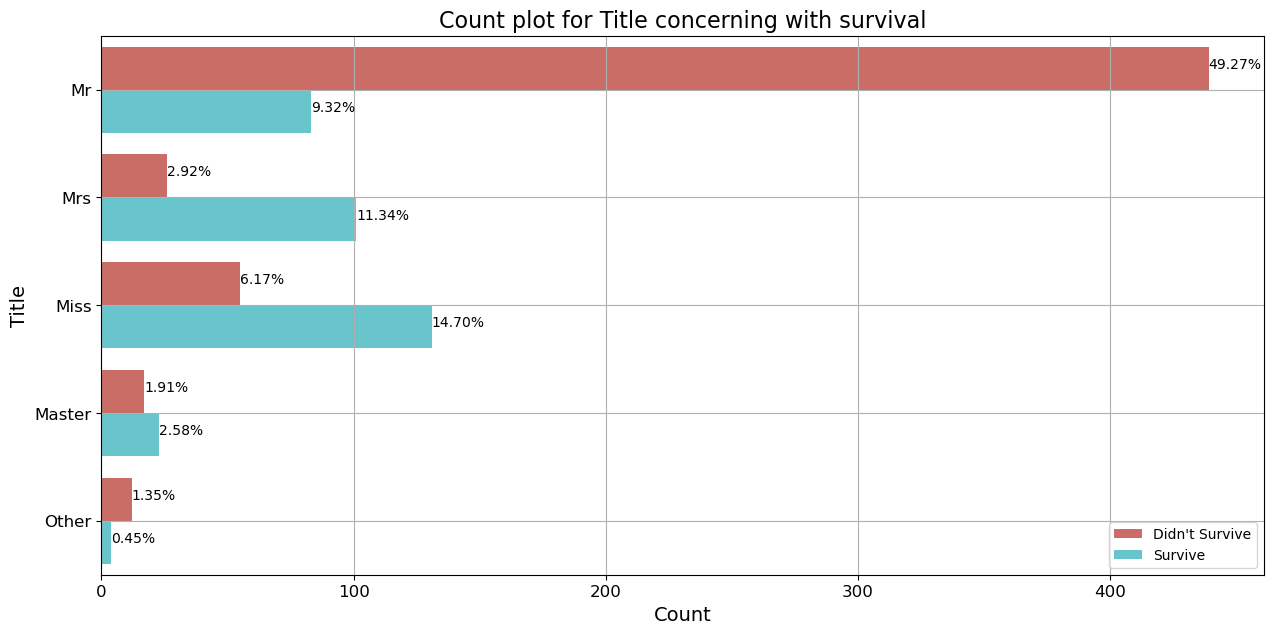

In [22]:
# Instantiate a figure of size of 15 x 7 inches
fig = plt.figure(figsize=[15, 7])

# Creating countplot of title vs survive
ax = sns.countplot(y='Title', hue='Survived', data=data, palette='hls')

# Adding percentages to the bars
total = data.shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Title', size=14)
plt.title(label="Count plot for Title concerning with survival", size=16)
plt.legend(labels=["Didn't Survive", "Survive"])
plt.grid(b=True)

# Display the figure
plt.show()

In [ ]:
#Observations:
#Mrs and Miss have particularly higher survival rate as compared to the rest of the titles.
#We can see that the passengers with the title "Mr" died the most.
#There are rarely any passengers with the Other title. We can't conclude if they were given more priority during the rescue.

In [ ]:
#7. Post Data Processing

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr


In [ ]:
#7.1 Data Encoding
#In this section, we will encode our categorical features such as Sex, Embarked, Title using one hot encoding.

In [24]:
# Performing one hot encoding over sex, embarked, title
data = pd.get_dummies(data=data, columns=['Sex', 'Embarked', 'Title'])
data.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,1,0,1,0,0,0,0,0,1,0


In [ ]:
#7.2 Data Scaling
# In this section, we will scale our features to ensure that it one feature doesn't have more impact than others in terms of weights.

In [25]:
# Instatiatig input and output data by dropping unnecessary data features
X = data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Age', 'Fare', 'Survived'], axis=1)
y = data['Survived']

# Instatiate a scaler object and performing transformation on age and fare
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Fare']])
data2 = pd.DataFrame(data = scaled_data, columns = ['Age', 'Fare'])
data2.head(2)


,Age,Fare
0,-0.565736,-0.502445
1,0.663861,0.786845


In [26]:
finalX = pd.concat(objs=[X,data2], axis=1)
finalX.head()

,Pclass,SibSp,Parch,Family Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Age,Fare
0,3,1,0,2,0,1,0,0,1,0,0,1,0,0,-0.565736,-0.502445
1,1,1,0,2,1,0,1,0,0,0,0,0,1,0,0.663861,0.786845
2,3,0,0,1,1,0,0,0,1,0,1,0,0,0,-0.258337,-0.488854
3,1,1,0,2,1,0,0,0,1,0,0,0,1,0,0.433312,0.420730
4,3,0,0,1,0,1,0,0,1,0,0,1,0,0,0.433312,-0.486337


In [ ]:
#7.3 Data Preparation
#Now we will split our data into dependent and independent variables for further development

In [27]:
#Splitting data into testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.20, random_state=42, stratify=y)

#Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (712, 16)
y_train shape:  (712,)
X_test shape:  (179, 16)
y_test shape:  (179,)


In [ ]:
#8. Model Developement and Evaluation

#In this section we will develop Decision Tree model
#Then we will analyze the results obtained and make our observations.
#For evaluation purpose we will focus on Precision, Recall and Accuracy scores.
#We will do hyperparameter tuning and see if the scores improves

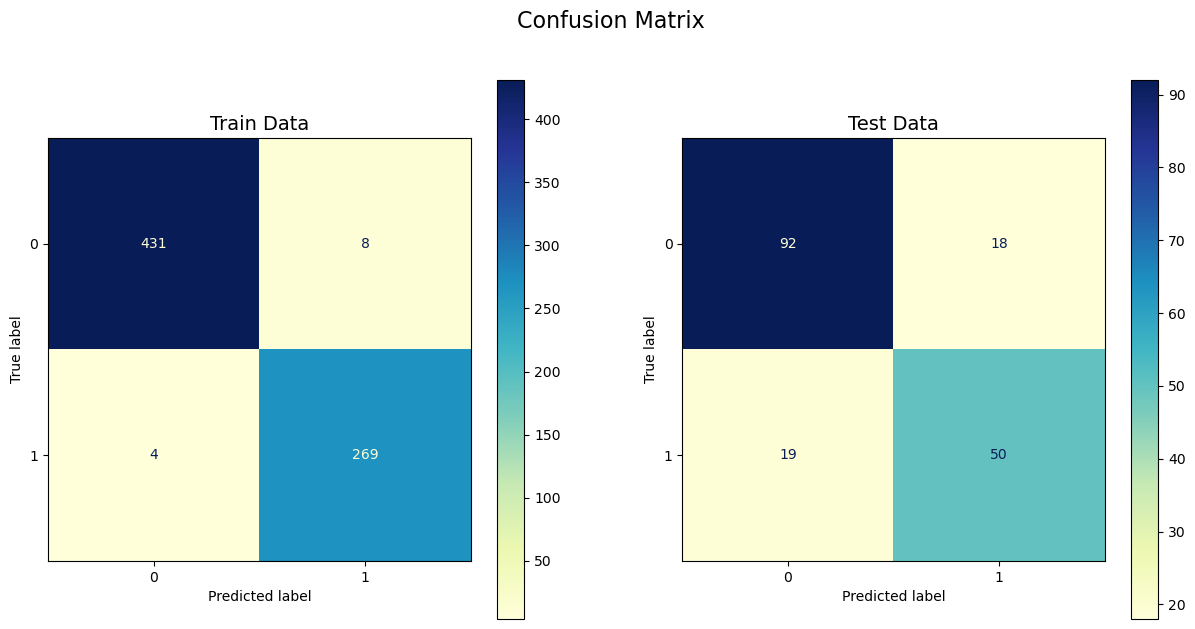

In [29]:
# Instantiate a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dtc.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = dtc.predict(X_train)
y_test_pred_count = dtc.predict(X_test)

# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=dtc, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtc, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

#you can use '.5g' to avoid decimal 0's

In [ ]:
#Observation:
#Train Data:
#Model predicted 431 instances correctly for negative class while 269 instances were predicted correctly for positive class.
#Model identified 8 instances negative but in actual they were positive.
#Model identified 4 instances positive but in actual they were negative.

#Test Data:
#Model predicted 92 instances correctly for negative class while 51 instances were predicted correctly for positive class.
#Model identified 18 instance negative but in actual it was positive.
#Model identified 18 instances positive but in actual they were negative.

In [30]:
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)

print('                Training Report              ')
print(train_report)
print('                Testing Report               ')
print(test_report)

                Training Report              
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       439
           1       0.97      0.99      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

                Testing Report               
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       110
           1       0.74      0.72      0.73        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [ ]:
#Observations:
#We can observe that we model is performing well on training data but on testing set is not better than 80%.
#This is due to overfitting of the model over the training set.

In [31]:
# Generate a pydot file
dot_tree = export_graphviz(decision_tree=dtc, 
                           filled=True, 
                           rounded=True, 
                           special_characters=True, 
                           feature_names=finalX.columns)

# Generate graph using pydot file
graph = pydotplus.graph_from_dot_data(dot_tree)  

# Display the graph
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

In [ ]:
#9. Conclusion
#9.1 Conclusion
#We have seen the impact of various factors such as Gender, Age, Port of Embarkment, FamilySize on the rate of survival.
#Women have a higher chances of survival than men.
#We have done feature selection and removed the features which does not seem to have any effect in our objective.
#We scaled our data so that one feature does not have too much weightage in explaining the target.
#We performed model development using decision tree with balanced weight and found that model is overfitting over the training set.
#To overcome the problem of overfitting one could use hyperparameter optimization or more complex model such as Random Forest.

In [ ]:
#9.2Actionable Insights
#More number of life-boats and life-jackets should be available to ensure passengers rescue.
#Passengers from higher classes should also help others during the time of crisis.
#Disabled passengers should be given more priority during the rescue.
#There should be more professional crew members to escort passengers during such emergencies.
#Passengers can be trained for emergency evacuations during or before the voyage to better co-ordinate with and help the crew on-board.
#Tools such as flares, search lights, radar should be made available adequately.